<a href="https://colab.research.google.com/github/hinton024/Assignment-2-Social-media-and-network-analytics/blob/main/Youtube_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download necessary libraries

In [5]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 2.4 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=1177465eb8bd8c490d5141cd711206ca4c71b94a25a2cfd50095c3e350bb2327
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [7]:
import pandas as pd
import re
import json
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re
import nltk
from langdetect import detect, LangDetectException
import contractions
from collections import Counter

In [8]:
# List of NLTK data packages to download
nltk_packages = ['punkt', 'wordnet', 'stopwords']

# Download each package
for package in nltk_packages:
    nltk.download(package)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Importing the Neccessary Libraries

In [9]:
import pandas as pd
import re
import json
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re
import nltk
from langdetect import detect, LangDetectException
import contractions
from collections import Counter

### 1. Data Preprocessing
#### Loading the Data

In [10]:
with open('DB_youtube.json', 'r', encoding='utf-8') as file:
    youtube = json.load(file)

# Converting the data into a DataFrame
df = pd.DataFrame(youtube)
df.head()


,Title,Video ID,Published at,Description,Category ID,Comment Count,Comments
0,10 ICONIC David Beckham goals you'll NEVER forget,oTpTVqJX8ho,2023-12-11T16:01:00Z,10 of the best Premier League goals scored by ...,17,627,"[Favourite David Beckham goal?, Goals before I..."
1,"David Beckham SURPRISES Thierry Henry, Jamie C...",wFDSJuqg0Vk,2024-09-17T19:56:02Z,"David Beckham surprised Kate Abdo, Jamie Carra...",17,1822,"[MY HERO!!😂😂😂, As if David lets his mom cut hi..."
2,David Beckham Embraces the Moment While Eating...,igmUnkx0fBw,2024-08-29T15:00:45Z,David Beckham takes on the Hot Ones gauntlet f...,24,4265,[Yet further evidence that David Beckham is on...
3,David Beckham on Spice Girls Reuniting for Vic...,rniYjUoNbOU,2024-05-09T06:00:23Z,"David talks about his honey, owning the Miami ...",23,771,"[Amazing performance mate&#39;s, changed game...."
4,David Beckham sends touching message to MESSI ...,wHE7ZN50WSk,2024-10-04T07:00:12Z,"beckham messi inter miami,beckham messi reacti...",17,34,"[Aquì vuelvo a decirlo, ha sido muy raro que B..."


#### Check for Missing Values

In [11]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()

# Display missing values
print("\nMissing Values:")
print(missing_values)


Missing Values:
Title            0
Video ID         0
Published at     0
Description      0
Category ID      0
Comment Count    0
Comments         0
dtype: int64


#### Check for Duplicate Values

In [12]:
# Check for duplicates based on Video ID
duplicates = df.duplicated(subset=['Video ID']).sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
df.drop_duplicates(subset=['Video ID'], inplace=True)


Number of duplicate rows: 0


#### Advance Preprocessing

In [13]:
# Function for clean text
def clean_text(text):
    # Removing URLs and special characters, convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower().strip()

# Function to detect if the text is in English
def is_english(text):
    try:
        return detect(text) == 'en'
    except LangDetectException:
        return False


In [14]:
# Filtering out non-English titles, descriptions, and comments
df['Cleaned_Title'] = df['Title'].apply(lambda x: clean_text(str(x)) if is_english(str(x)) else '')
df['Cleaned_Description'] = df['Description'].apply(lambda x: clean_text(str(x)) if is_english(str(x)) else '')

# cleaning and filtering each comment within the list
df['Cleaned_Comments'] = df['Comments'].apply(lambda comments: [clean_text(comment) for comment in comments if is_english(comment)])

#### Expanding Contractions

In [15]:
# Expand contractions for each column separately
df['Expanded_Title'] = df['Cleaned_Title'].apply(contractions.fix)
df['Expanded_Description'] = df['Cleaned_Description'].apply(contractions.fix)
df['Expanded_Comments'] = df['Cleaned_Comments'].apply(lambda comments: [contractions.fix(comment) for comment in comments])

#### Tokenization

In [16]:
# Tokenizing the cleaned text
nltk.download('punkt')
df['Title_Tokens'] = df['Cleaned_Title'].apply(word_tokenize)
df['Description_Tokens'] = df['Cleaned_Description'].apply(word_tokenize)
df['Comments_Tokens'] = df['Cleaned_Comments'].apply(lambda comments: [word_tokenize(comment) for comment in comments])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Stopwords Removal

In [17]:
nltk.download('stopwords')
# Removal of Stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['Title_Tokens'] = df['Title_Tokens'].apply(remove_stopwords)
df['Description_Tokens'] = df['Description_Tokens'].apply(remove_stopwords)
df['Comments_Tokens'] = df['Comments_Tokens'].apply(lambda comments: [remove_stopwords(comment) for comment in comments])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Lemmatization

In [18]:
nltk.download('wordnet')
nltk.download('wordnet')
# Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['Title_Tokens'] = df['Title_Tokens'].apply(lemmatize_tokens)
df['Description_Tokens'] = df['Description_Tokens'].apply(lemmatize_tokens)
df['Comments_Tokens'] = df['Comments_Tokens'].apply(lambda comments: [lemmatize_tokens(comment) for comment in comments])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
# Printing the processed data
processed_columns = ['Title', 'Cleaned_Title', 'Title_Tokens', 'Description', 'Cleaned_Description', 'Description_Tokens', 'Comments', 'Cleaned_Comments', 'Comments_Tokens']
print("\nProcessed Data:")
print(df[processed_columns].head(5))


Processed Data:
                                               Title  \
0  10 ICONIC David Beckham goals you'll NEVER forget   
1  David Beckham SURPRISES Thierry Henry, Jamie C...   
2  David Beckham Embraces the Moment While Eating...   
3  David Beckham on Spice Girls Reuniting for Vic...   
4  David Beckham sends touching message to MESSI ...   

                                       Cleaned_Title  \
0      iconic david beckham goals youll never forget   
1  david beckham surprises thierry henry jamie ca...   
2  david beckham embraces the moment while eating...   
3  david beckham on spice girls reuniting for vic...   
4  david beckham sends touching message to messi ...   

                                        Title_Tokens  \
0  [iconic, david, beckham, goal, youll, never, f...   
1  [david, beckham, surprise, thierry, henry, jam...   
2  [david, beckham, embrace, moment, eating, spic...   
3  [david, beckham, spice, girl, reuniting, victo...   
4  [david, beckham, sends, to

#### Term Frequency

In [20]:
lemmatizer = WordNetLemmatizer()
stopwords_set = set(stopwords.words('english'))

# Function to process text: tokenize, remove stopwords, and lemmatize
def process_text(text, lemmatizer, stopwords_set):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords_set]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

In [21]:
nltk.download('wordnet')
term_freq_counter = Counter()

# Processing each row in the DataFrame and update term frequency counts
for _, row in df.iterrows():
    tokens_title = process_text(row['Cleaned_Title'], lemmatizer, stopwords_set)
    tokens_description = process_text(row['Cleaned_Description'], lemmatizer, stopwords_set)
    tokens_comments = [word for comment in row['Cleaned_Comments'] for word in process_text(comment, lemmatizer, stopwords_set)]

    term_freq_counter.update(tokens_title)
    term_freq_counter.update(tokens_description)
    term_freq_counter.update(tokens_comments)

# Display the most common terms
freq_num = 50  # Number of most frequent terms to display
print(f"Top {freq_num} most common terms:")
for term, count in term_freq_counter.most_common(freq_num):
    print(f"{term}: {count}")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Top 50 most common terms:
beckham: 363
david: 268
like: 208
one: 178
man: 154
player: 152
love: 147
football: 113
time: 104
great: 90
good: 88
best: 87
never: 86
he: 86
world: 85
would: 84
know: 80
real: 77
get: 76
people: 76
game: 72
show: 72
guy: 71
dont: 71
legend: 71
england: 70
href: 69
even: 67
see: 67
really: 65
goal: 64
u: 64
year: 64
play: 63
team: 62
ever: 61
look: 61
messi: 61
got: 60
always: 59
ball: 58
much: 58
kick: 57
well: 56
still: 56
thats: 51
free: 50
fan: 50
im: 50
say: 50


# WordCloud of Sentiment Heavy Words and Entities

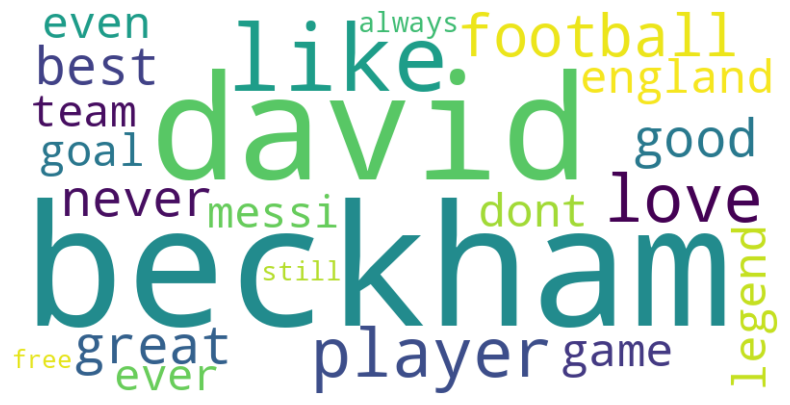

In [22]:
# Visualizing the sentiment heavy words and entities
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Dictionary with sentiment heavy words and entities and their frequencies as values
words_freq = {
    "beckham": 364,
    "david": 268,
    "like": 208,
    "player": 152,
    "love": 147,
    "football": 113,
    "great": 90,
    "good": 88,
    "best": 87,
    "never": 85,
    "game": 72,
    "england": 70,
    "legend": 70,
    "dont": 70,
    "even": 66,
    "goal": 63,
    "team": 62,
    "messi": 61,
    "ever": 60,
    "always": 59,
    "still": 56,
    "free": 50
}

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_freq)

# Plotting the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hiding axes
plt.show()


# Bar Chart of Sentiment Heavy Words and Entities with their frequencies

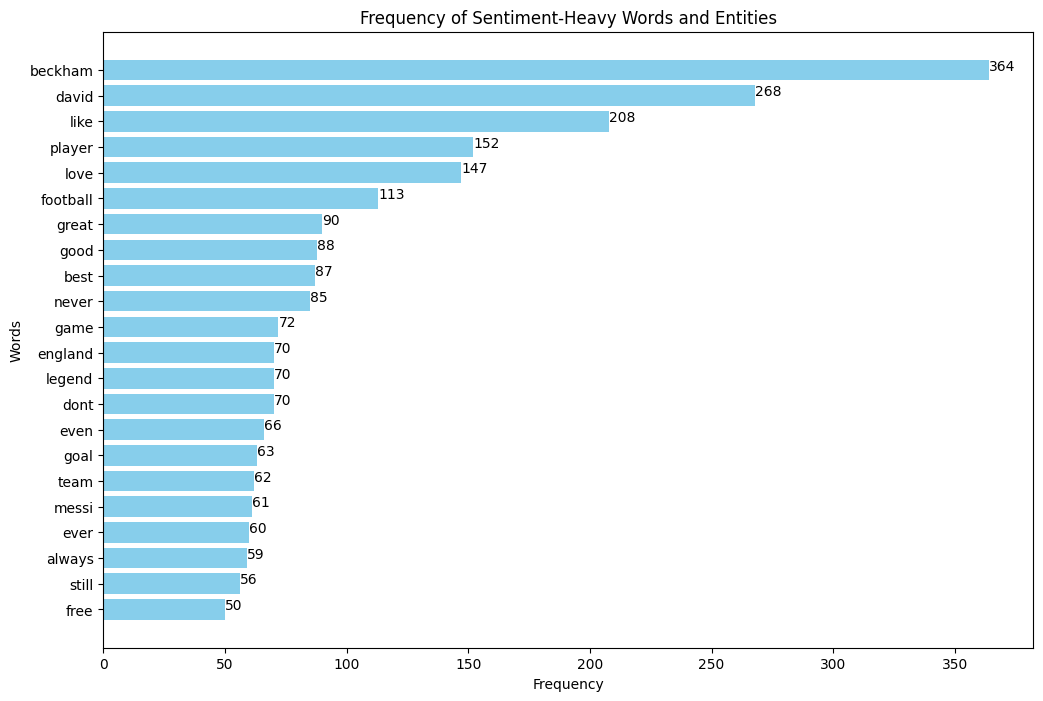

In [23]:
# Visualizing the sentiment heavy words and entities and their frequencies as values

# List of words and their frequencies
words = [
    "beckham", "david", "like", "player", "love", "football", "great", "good",
    "best", "never", "game", "england", "legend", "dont",
    "even", "goal", "team", "messi", "ever", "always", "still", "free"
]

frequencies = [
    364, 268, 208, 152, 147, 113, 90, 88,
    87, 85, 72, 70, 70, 70,
    66, 63, 62, 61, 60, 59, 56, 50
]

# Plotting the bar chart
plt.figure(figsize=(12,8))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Frequency of Sentiment-Heavy Words and Entities')
plt.gca().invert_yaxis()  # Inverting y axis to have the most frequent word on top

# Adding frequencies next to the bars  # Adding frequencies next to the bar
for index, value in enumerate(frequencies):
    plt.text(value, index, str(value))
plt.show()

# Tfidf Vectorization

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Function for Pre-processing text by removing numbers
def preprocess_text(text):
    return re.sub(r'\d+', '', text)

# loading data from json file
with open('DB_youtube.json', 'r', encoding='utf-8') as f:
    posts_data = json.load(f)

    comments = []
    for post in posts_data:
        for comment in post['Comments']:
            preprocessed_comment = preprocess_text(comment)  # Preprocessing the comments
            comments.append(preprocessed_comment)  # Storing preprocessed comments

# Converting the comments into a dataframe
df = pd.DataFrame(comments, columns=['Cleaned_Comments'])

# Checking the dataframe
print("DataFrame preview (first 5 rows):")
print(df.head())

# Adjusting the token pattern to exclude purely numerical tokens and refining the ngram range
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,
    stop_words='english',
    token_pattern=r'\b[a-zA-Z]{3,}\b',  # Excludes purely numeric tokens and requires at least three characters
    ngram_range=(1,2),  #unigram and bi-gram
    min_df=10,  # Increase min_df to reduce features that appear rarely
    max_df=0.5 # Lower max_df to exclude terms that are too common

)

# Fitting and transforming the comments into TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(df['Cleaned_Comments']).toarray()

# Converting to DataFrame for better readability
tfidf_df = pd.DataFrame(X_tfidf, columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df.head())

DataFrame preview (first 5 rows):
                     Cleaned_Comments
0       Favourite David Beckham goal?
1  Goals before I was born..Beckham❤❤
2      Clearly not just a pretty face
3    greatest of his generation.... ❤
4   Bald beckham at United was scary.
   absolute  absolutely  act  actually  age  amazing  amp  awesome  bad  ball  \
0       0.0         0.0  0.0       0.0  0.0      0.0  0.0      0.0  0.0   0.0   
1       0.0         0.0  0.0       0.0  0.0      0.0  0.0      0.0  0.0   0.0   
2       0.0         0.0  0.0       0.0  0.0      0.0  0.0      0.0  0.0   0.0   
3       0.0         0.0  0.0       0.0  0.0      0.0  0.0      0.0  0.0   0.0   
4       0.0         0.0  0.0       0.0  0.0      0.0  0.0      0.0  0.0   0.0   

   ...  www  www youtube  yeah  year  years  yes  young  youtube  youtube com  \
0  ...  0.0          0.0   0.0   0.0    0.0  0.0    0.0      0.0          0.0   
1  ...  0.0          0.0   0.0   0.0    0.0  0.0    0.0      0.0          0.0   
2  ...  

# Vader Sentiment Analysis

In [25]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initializing VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Sentiment analysis with error handling
def analyze_sentiment(text):
    if text:  # Checking if text is not empty or None
        try:
            sentiment = analyzer.polarity_scores(text)
            return sentiment['compound']  # Compund score represents overall sentiment
        except Exception as e:
            print(f"Error analyzing sentiment: {e}")
            return None  # Return None if there's an error
    else:
        return None  # Return None for empty or None text

# Applying sentiment analysis
df['sentiment_score'] = df['Cleaned_Comments'].apply(analyze_sentiment)

# Categorize sentiment based on the score
def categorize_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

# Printing results
print("DataFrame with sentiment scores and categories (first 5 rows):")
print(df[['Cleaned_Comments', 'sentiment_score', 'sentiment_category']].head())

DataFrame with sentiment scores and categories (first 5 rows):
                     Cleaned_Comments  sentiment_score sentiment_category
0       Favourite David Beckham goal?           0.0000            neutral
1  Goals before I was born..Beckham❤❤           0.8555           positive
2      Clearly not just a pretty face           0.0186            neutral
3    greatest of his generation.... ❤           0.8555           positive
4   Bald beckham at United was scary.          -0.1027           negative


#  Visualizing sentiment score distribution by histogram and density plot

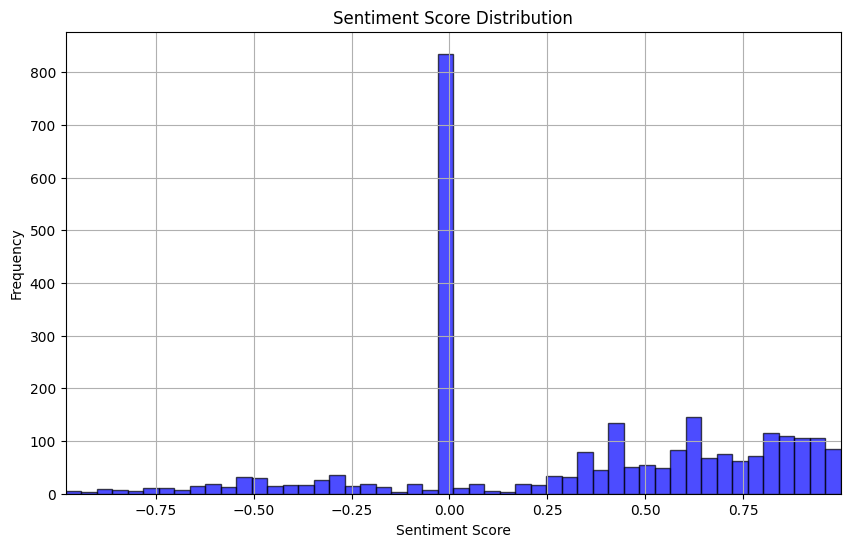

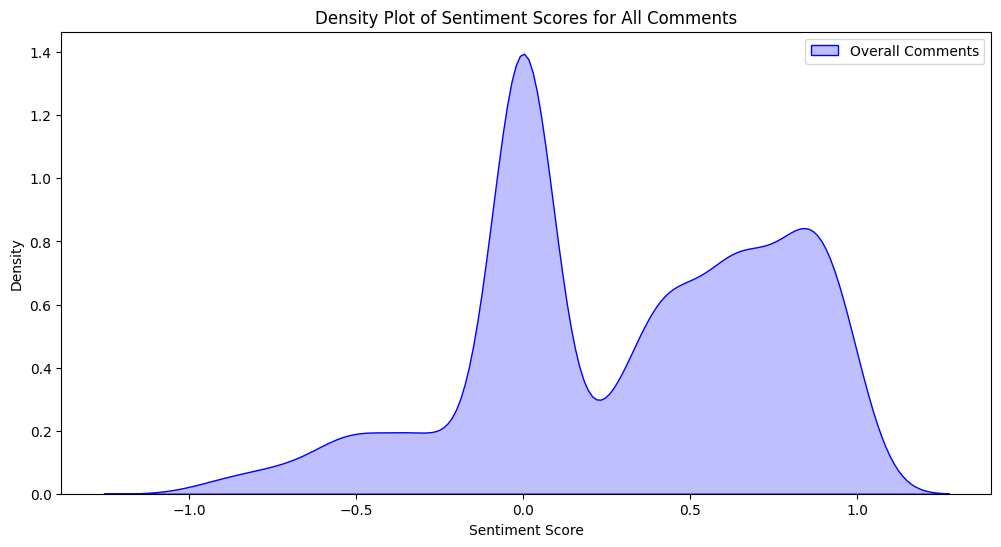

In [26]:
#Visualizing sentiment score distribution by histogram and density plot

num_bins = 50  # Number of bins

# Plotting sentiment score distribution
plt.figure(figsize=(10,6))
plt.hist(df['sentiment_score'], bins=num_bins, alpha=0.7, color='blue', edgecolor='black')
plt.grid(True)   # For better readability

# Setting plot titles and labels
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution')

# Setting x and y limits
plt.xlim(df['sentiment_score'].min(), df['sentiment_score'].max())
plt.ylim(0, plt.ylim()[1])  # Ensuring y axis starts from 0 and is correclty scaled

plt.show()


# Plotting density of sentiment scores for all comments
import seaborn as sns
plt.figure(figsize=(12,6))
sns.kdeplot(df['sentiment_score'], fill=True, color='blue', label='Overall Comments')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Density Plot of Sentiment Scores for All Comments')
plt.legend()
plt.show()

# Word Cloud for overall comments

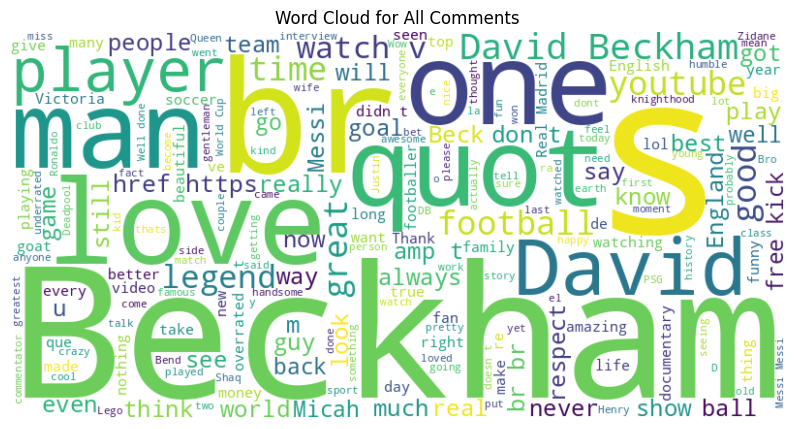

In [27]:
# Word Cloud for overall comments

from wordcloud import WordCloud, STOPWORDS
all_comments = ' '.join(df['Cleaned_Comments'])

# Generating word cloud with custom settings
wordcloud = WordCloud(
    width=800, height=400, background_color='white',
    stopwords=set(STOPWORDS), max_words=200, colormap='viridis'
).generate(all_comments)

# Displaying the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels and ticks
plt.title('Word Cloud for All Comments')
plt.show()


### LDA Model

### Plotting coherence term plot to determine optimal number of topics

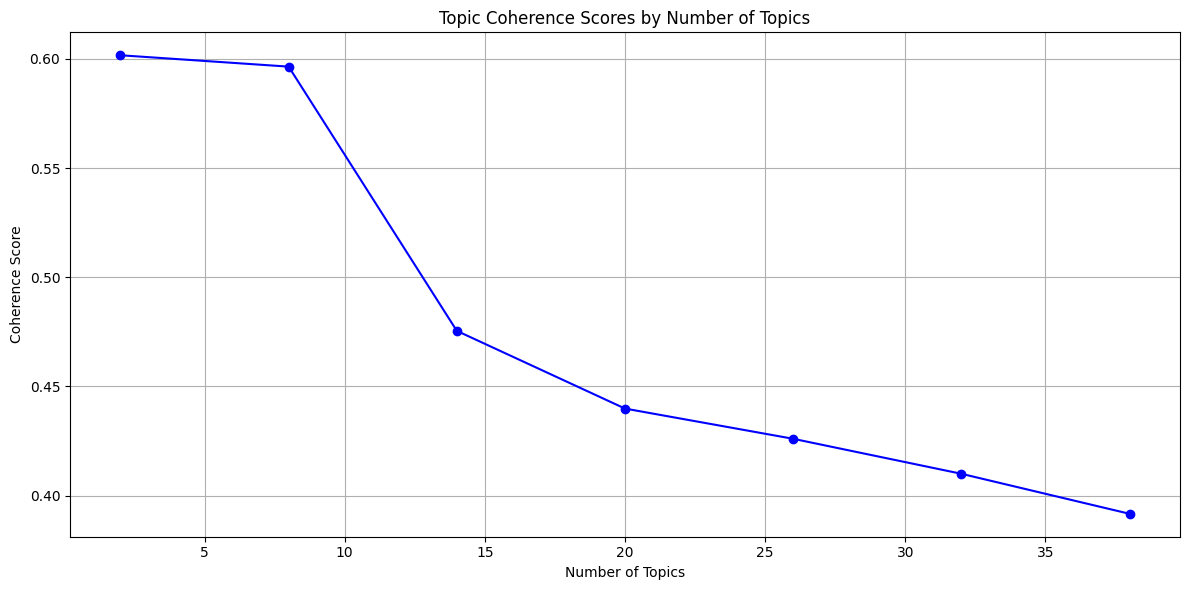

Optimal number of topics: 2


In [29]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count
import numpy as np

# Extracting 'Cleaned_Comments' from the DataFrame
lPosts = df['Cleaned_Comments'].tolist()
# print(lPosts)
data = [post.split() for post in lPosts]

# Create Dictionary and Corpus (this part remains the same)
id2word = corpora.Dictionary(data)
texts = data
corpus = [id2word.doc2bow(text) for text in texts]

def compute_coherence_for_model(params):
    """Compute coherence for a single model"""
    num_topics, dictionary, corpus, texts = params
    model = gensim.models.LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=100,
        update_every=1,
        chunksize=100,
        passes=10,
        alpha='auto',
        per_word_topics=True
    )
    coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    """Compute coherence values for multiple models in parallel"""
    pool = Pool(processes=cpu_count())
    coherence_values = pool.map(
        compute_coherence_for_model,
        [(num_topics, dictionary, corpus, texts) for num_topics in range(start, limit, step)]
    )
    pool.close()
    pool.join()
    return coherence_values

# Set parameters
start, limit, step = 2, 40, 6

# Compute coherence values
coherence_values = compute_coherence_values(id2word, corpus, texts, start, limit, step)

# Plot results
x = range(start, limit, step)
plt.figure(figsize=(12, 6))
plt.plot(x, coherence_values, 'bo-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Topic Coherence Scores by Number of Topics")
plt.grid(True)
plt.tight_layout()
plt.show()

# Find optimal number of topics
optimal_num_topics = x[np.argmax(coherence_values)]
print(f'Optimal number of topics: {optimal_num_topics}')


In [30]:
topicNum = 10
wordNumToDisplay = 10
featureNum = 1500

## Performs counting via CountVectorizer and then apply the LDA model.

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
tf = tfVectorizer.fit_transform(lPosts)
tfFeatureNames = tfVectorizer.get_feature_names_out()

ldaModel = LatentDirichletAllocation(n_components =topicNum, max_iter=10, learning_method='online').fit(tf)

### Visualising topics

In [32]:
# Define the display_topics function
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        for i in topic.argsort()[:-num_top_words - 1:-1]:
            print(f"{feature_names[i]} ({topic[i]:.4f})")
        print()

## Diplays discovered topics.

In [33]:
display_topics(ldaModel, tfFeatureNames, wordNumToDisplay)

Topic 0:
watch (105.0626)
amp (104.5683)
youtube (93.4134)
com (91.3423)
www (90.5401)
href (89.8500)
https (87.8548)
father (14.3351)
legends (13.8902)
uxbqatbaxf (13.5936)

Topic 1:
br (291.0433)
david (244.9524)
beckham (193.9003)
quot (157.1972)
football (102.8362)
legend (88.7193)
great (65.5070)
best (49.1107)
better (46.8846)
play (46.6437)

Topic 2:
love (150.7349)
br (56.1282)
goat (28.7280)
way (26.7766)
got (22.9267)
beckham (20.6301)
ich (15.7968)
need (14.3850)
dude (13.2783)
cool (12.4706)

Topic 3:
wife (27.3454)
game (25.1664)
gentleman (22.2174)
bro (22.1049)
actually (21.8175)
awesome (19.7754)
david (19.4845)
true (18.7911)
fun (18.1225)
spice (18.0199)

Topic 4:
respect (52.2598)
thank (32.3795)
money (31.6942)
footballer (26.6371)
funny (25.1347)
old (20.6254)
captain (16.9839)
famous (16.6767)
support (15.1742)
jesus (13.8890)

Topic 5:
man (164.7804)
player (107.9789)
like (98.4936)
good (76.4957)
people (71.5185)
beckham (71.3865)
world (67.0990)
just (62.7010)


In [35]:
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()
panel = pyLDAvis.lda_model.prepare(ldaModel, tf, tfVectorizer, mds='tsne') # Use lda_model for prepare
pyLDAvis.display(panel)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Network Analysis and Community Detection

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Documents related to Topic 0:

Document 1: <a href="https://www.youtube.com/watch?v=oTpTVqJXho&amp;t=">:</a> That’s a truly elegant goal, that’s the best way to describe it.

Document 2: underrated as fuck

Document 3: <a href="https://www.youtube.com/watch?v=oTpTVqJXho&amp;t=">:</a> Haaland?

Document 4: <a href="https://www.youtube.com/watch?v=oTpTVqJXho&amp;t=">:</a> Haaland

Document 5: <a href="https://www.youtube.com/watch?v=oTpTVqJXho&amp;t=">:</a> Haaland in ManCity 😂 He’s older than I expected

Document 6: <a href="https://www.youtube.com/watch?v=oTpTVqJXho&amp;t=">:</a> # last name 🤣🤣🤣

Document 7: <a href="https://www.youtube.com/watch?v=oTpTVqJXho&amp;t=">:</a>  Erling Haaland’s father knocking down Scholes 😬😬😬

Document 8: what is that kit at<a href="https://www.youtube.com/watch?v=oTpTVqJXho&amp;t=">:</a>

Document 9: <a href="https://www.youtube.com/watch?v=oTpTVqJXho&amp;t=">:</a> haaland’s dad 😂

Document 10: <a href="https://www.youtube.com/watch?v=oTpTVqJXho&amp;t=">

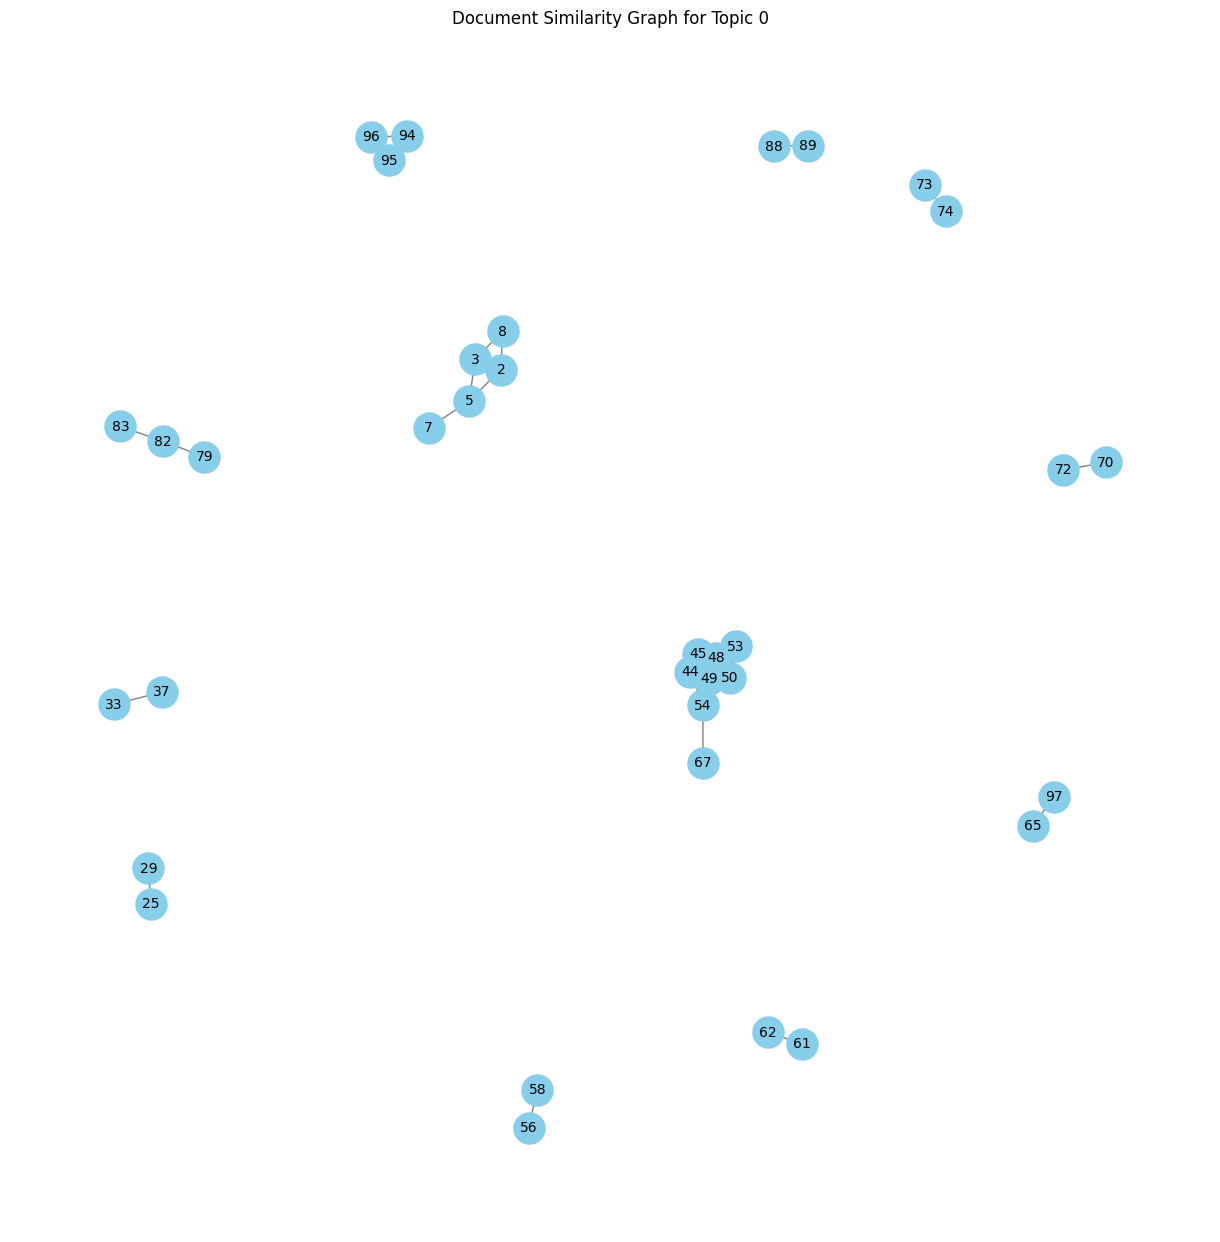

Documents related to Topic 1:

Document 1: Becks scores only bangers

Document 2: No one has ever been able to consistently recreate how well Beckham could strike a ball. <br><br>We&#;ve seen players who are great and striking a ball and taking dead ball situations to another level but not on the same level as Beckham. <br><br>Roberto Carlos was a great strike of a ball but wasn&#;t as consistently precise as Beckham. Flawless technique.

Document 3: As mentioned &quot;A goal you will see over and over again&quot; <br><br>Still seeing it after all these years 🙇‍♂️

Document 4: I feel sorry for kids who are simply too young to have seen David Beckham play at Manchester United. <br>You thought Messi, Cristiano Ronaldo and Mbappe are superstars? NO. <br>They are not even % of how big a superstar David Beckham was at Manchester United.

Document 5: Perez Thomas Walker Edward Wilson Mark

Document 6: Legend

Document 7: And yet, he never won anything for his country.

Document 8: Becks was 

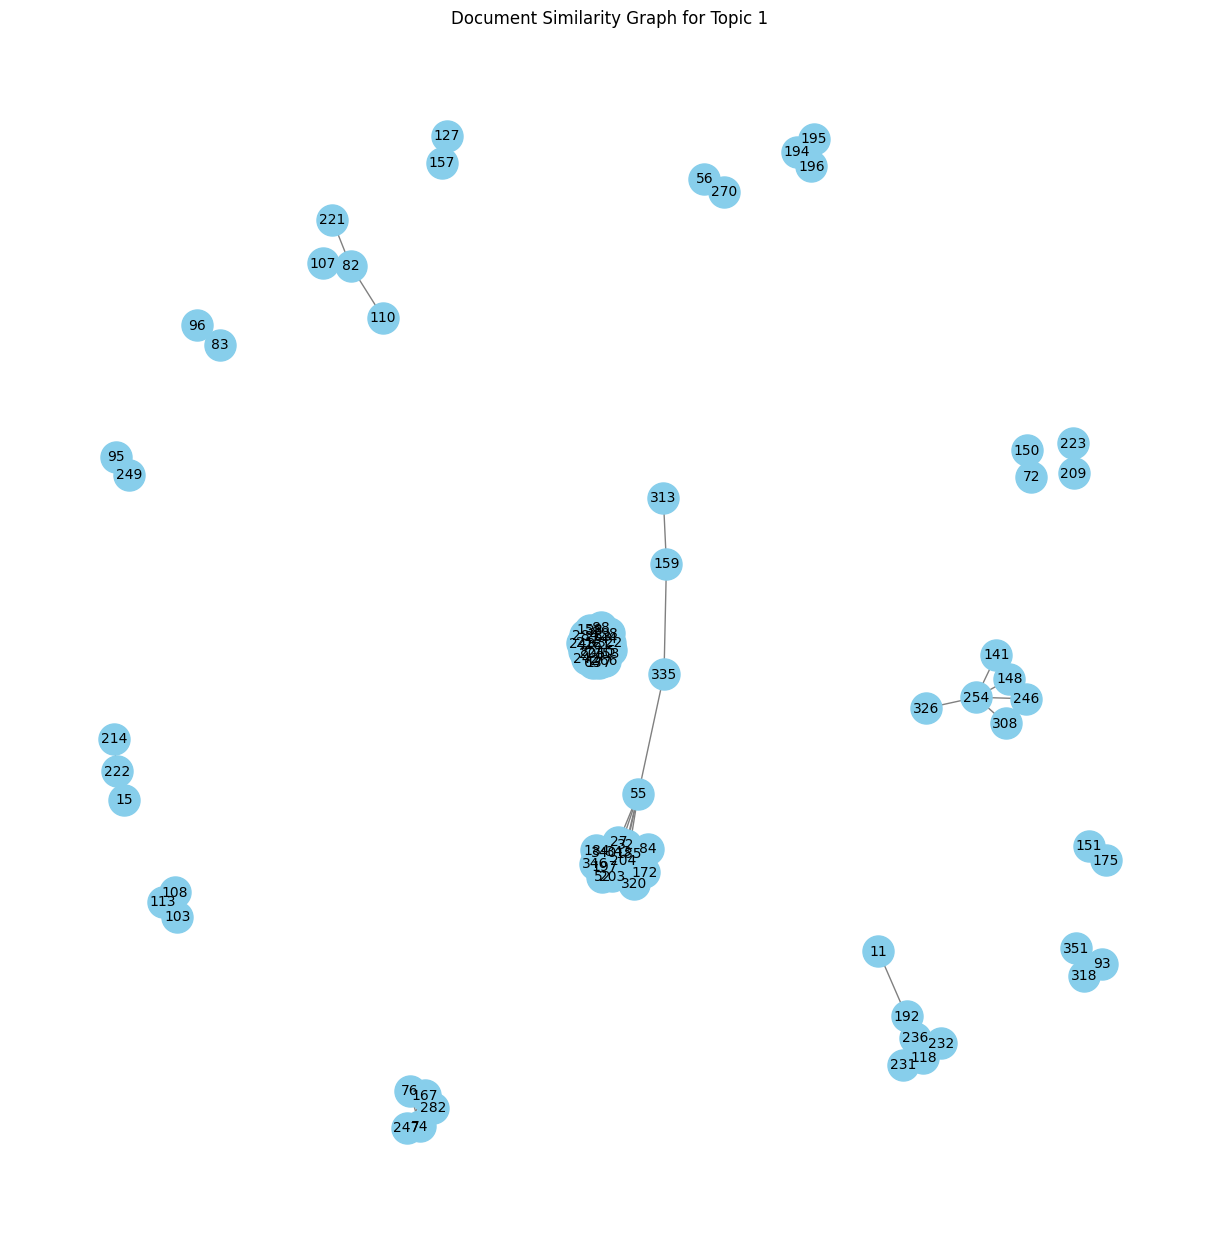

Documents related to Topic 2:

Document 1: British 🐐

Document 2: Saya suka, cara dia mengancang-ancang sebelum bola di tendang

Document 3: Yep they do. Weekend specials, actually. Extra spins if you play on Saturdays.

Document 4: That&#;s cool. Do they have bonuses for wheel games too? I heard those can get pretty exciting

Document 5: Hey buddy have you tried the live casino on rabet yet? It&#;s almost like being in Vegas

Document 6: I love soccer and I could watch this all day

Document 7: He is the goat of freekick takers

Document 8: Halcyon days.

Document 9: Great at free kicks, but the quality and quantity of his open play goals is nothing compared to Steve Gerrard.

Document 10: GOAT

Document 11: <b>&quot;You guys got honey, ha ha!&quot;</b><br>That&#;s why she&#;s the perfect fit.

Document 12: I love the way Kate said &quot;ohhhh you guys got honey&quot;😂😂😂😂😂low key

Document 13: &quot;you guys got honey&quot;   Love Kate.  She&#;s the best!

Document 14: ❤ David. Also l

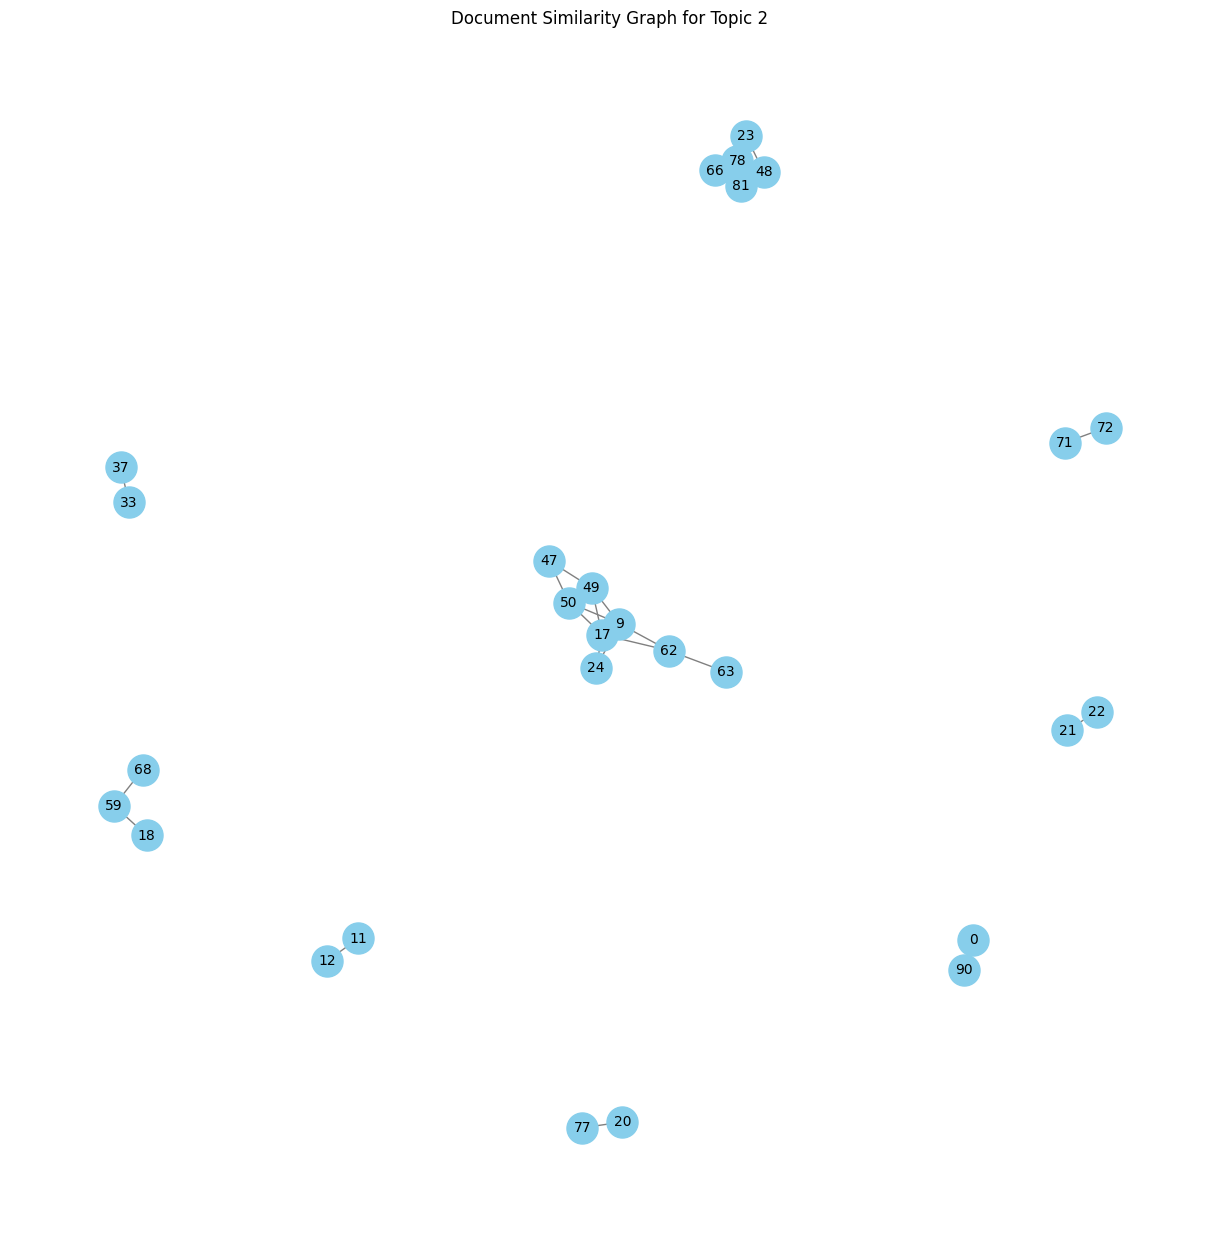

Documents related to Topic 3:

Document 1: the one was uploaded twice here

Document 2: Nothing beats the thrill of betting with ra, where the odds are always fair.

Document 3: Telling everyone about ra&#;s fair betting, it&#;s a game changer.

Document 4: Awesome I&#;ll log in this weekend then. Have you joined any of the live game shows? They&#;re a blast and have unique bonuses

Document 5: One word .....Greece .

Document 6: See how exciting it is when players actually run withe the ball.......

Document 7: As if David lets his mom cut his hair. : /

Document 8: Thiery Henry is not able to hide his jealousy towards Beck.<br>David is a gentleman 🎩

Document 9:  UCL Winners And  UCL Dreamers 🤣🤣🤣

Document 10: Henry ruins this show

Document 11: This is Henry showing off his phonebook😂🔥

Document 12: Henry saw David coming from the shawdow and became speechless 😂😂😂

Document 13: Who is ypur favorite on the show David?😂😂😂😂😂

Document 14: Is Henry and that female presenter dating or su

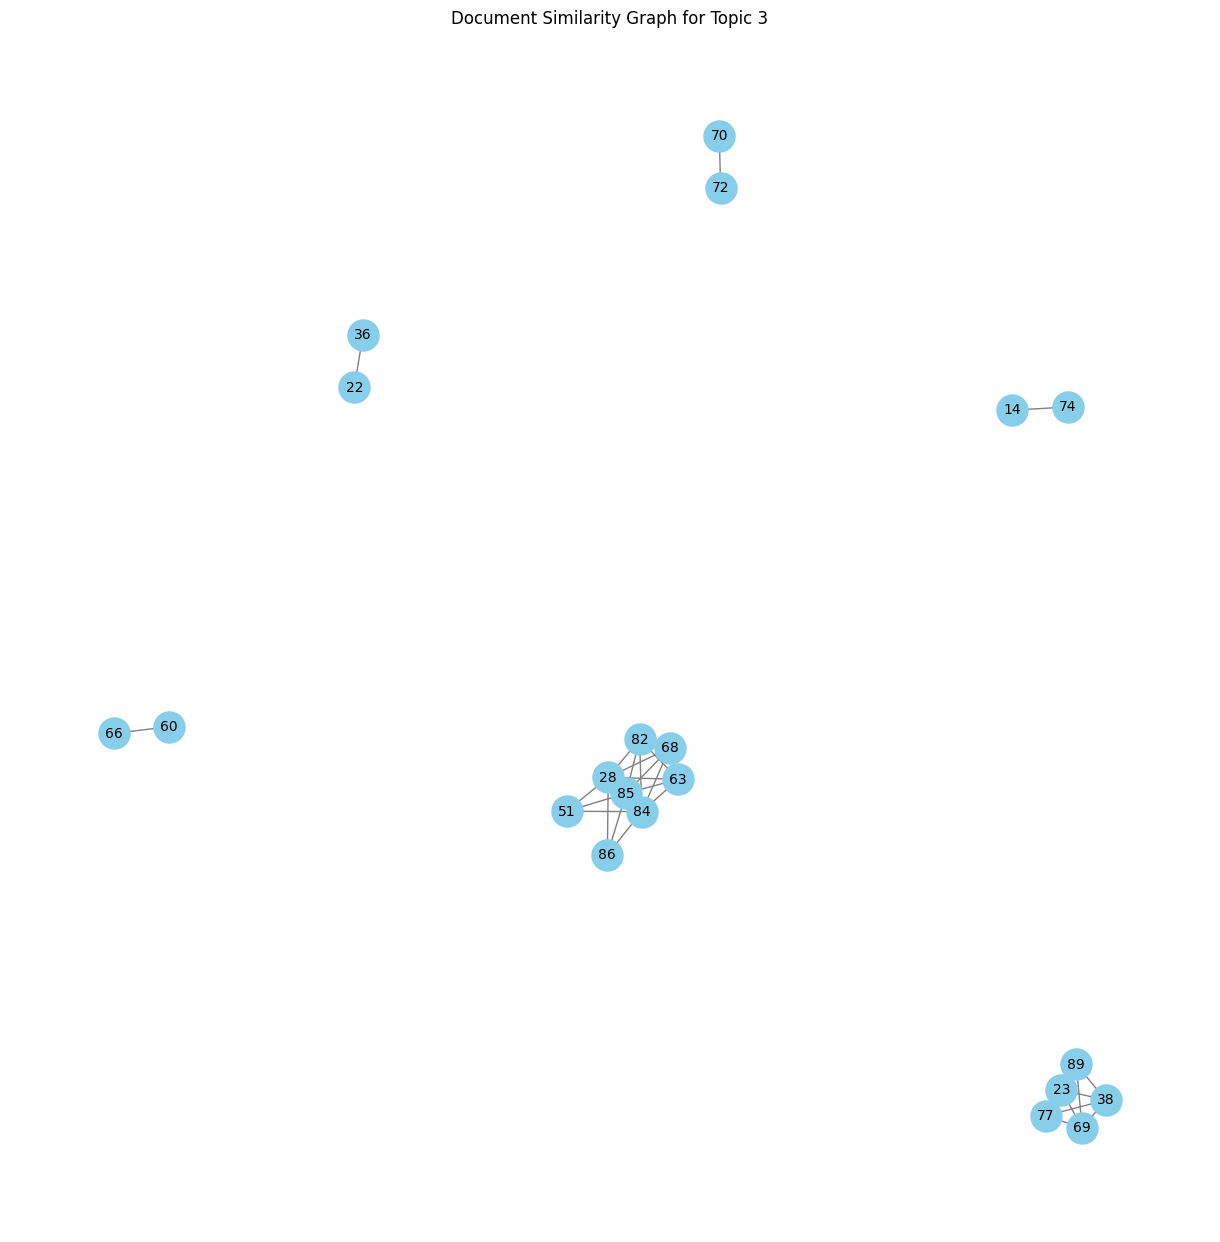

Documents related to Topic 4:

Document 1: Love the weekly chances RA gives us, their odds are always spot on.

Document 2: If you want quick betting action and quicker money, ra is the place, guys

Document 3: I grew up hearing about Beckham brilliance and now i see they were no exaggeration. Top quality

Document 4: It&#;s funny how he became so famous outside the pitch, that he somehow got underrated as a footballer

Document 5: MY HERO!!😂😂😂

Document 6: HEY HENRY SHOW YOUR RESPECT TO BECKHAM ,, DONT TROW SHIRT IN FRONT OF HIM !!!

Document 7: Henry smiling and snorking is the funniest😂

Document 8: Respect to big Meeks how he fold the jersey, you dont see many (old) city players doing that.

Document 9: Love him usually but weird energy from Henry this segment. Giving off attention-jealousy vibes.

Document 10: Meeks deserves the kind of money that pays for those cuts, and whoever grouped these folk

Document 11: Meeks deserves the kind of money that pays for those cuts, and whoeve

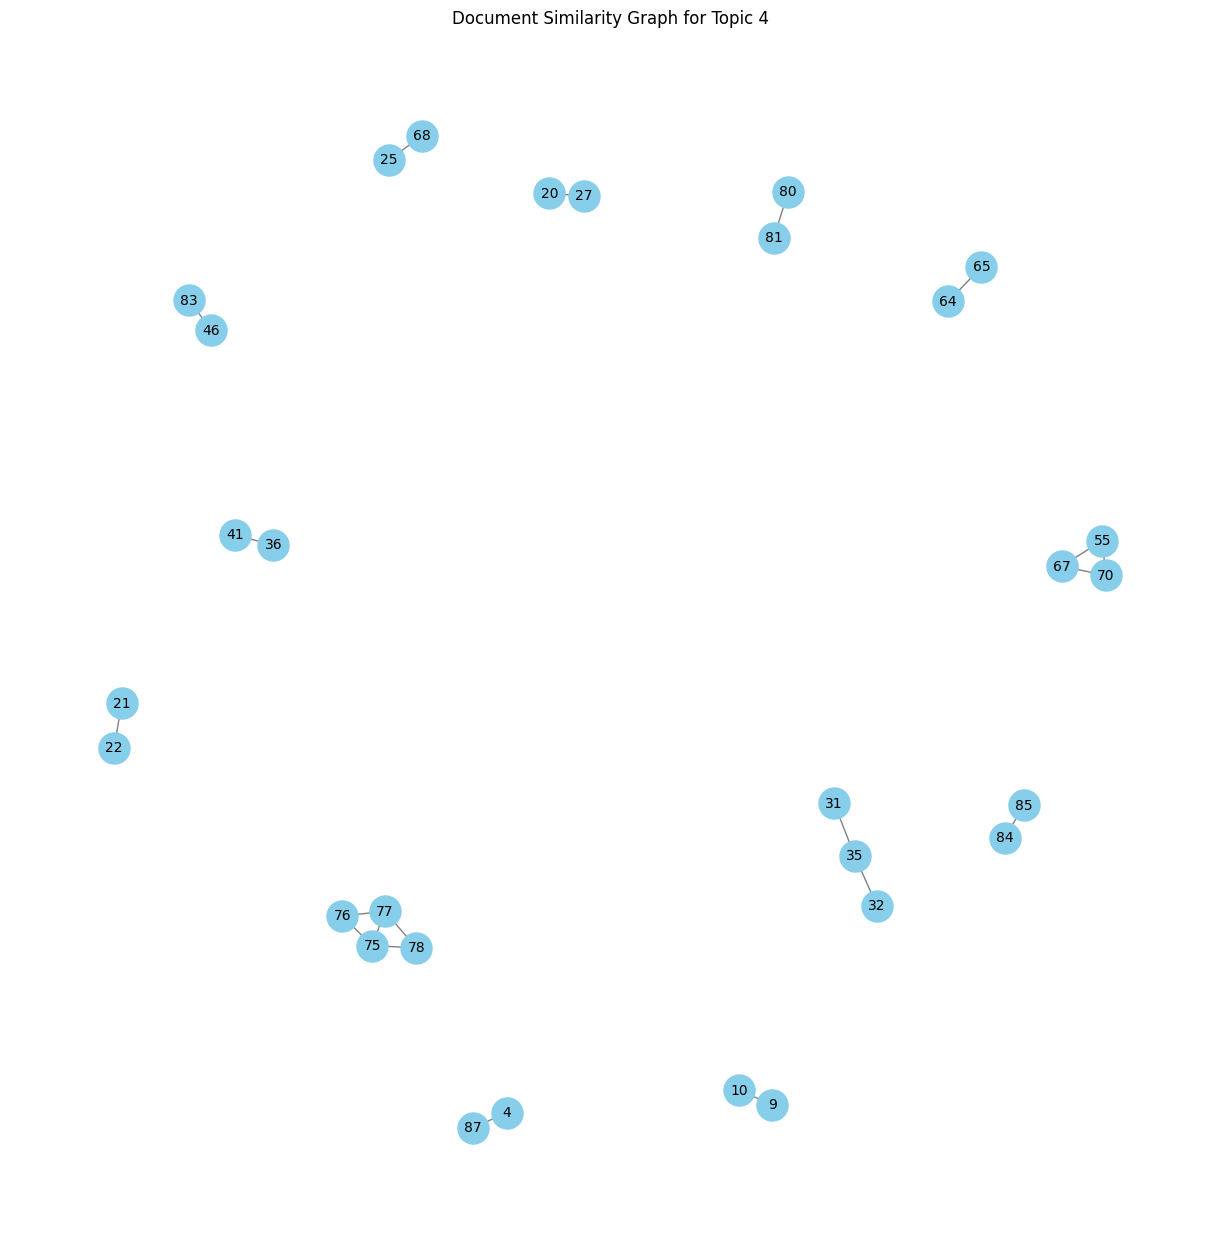

Documents related to Topic 5:

Document 1: greatest of his generation.... ❤

Document 2: Should&#;ve included his free kick in  world cup&#;s quarter finals

Document 3: When i was kid he was and still he is my favourite he looks like a super  model  ...all time fav of mine ❤❤

Document 4: Ball english was always going to his left, goalies right. Just guard half the goal on those free kicks...

Document 5: It blows my mind how many people (mostly the youths, probably because they were too young or not even born yet) who have forgotten/don&#;t know truly how amazing this man was. He wasn&#;t just a good looking guy. England has produced some truly great players, but during his prime he was arguably the greatest player playing in the world, at least top . He was a wizard when it came to taking free kicks, and he knew how to deliver the ball perfectly to a forward who had a little pace.

Document 6: Bend it like Beckham.

Document 7: Nah.. this was Gold 😂

Document 8: Becks is simply a bo

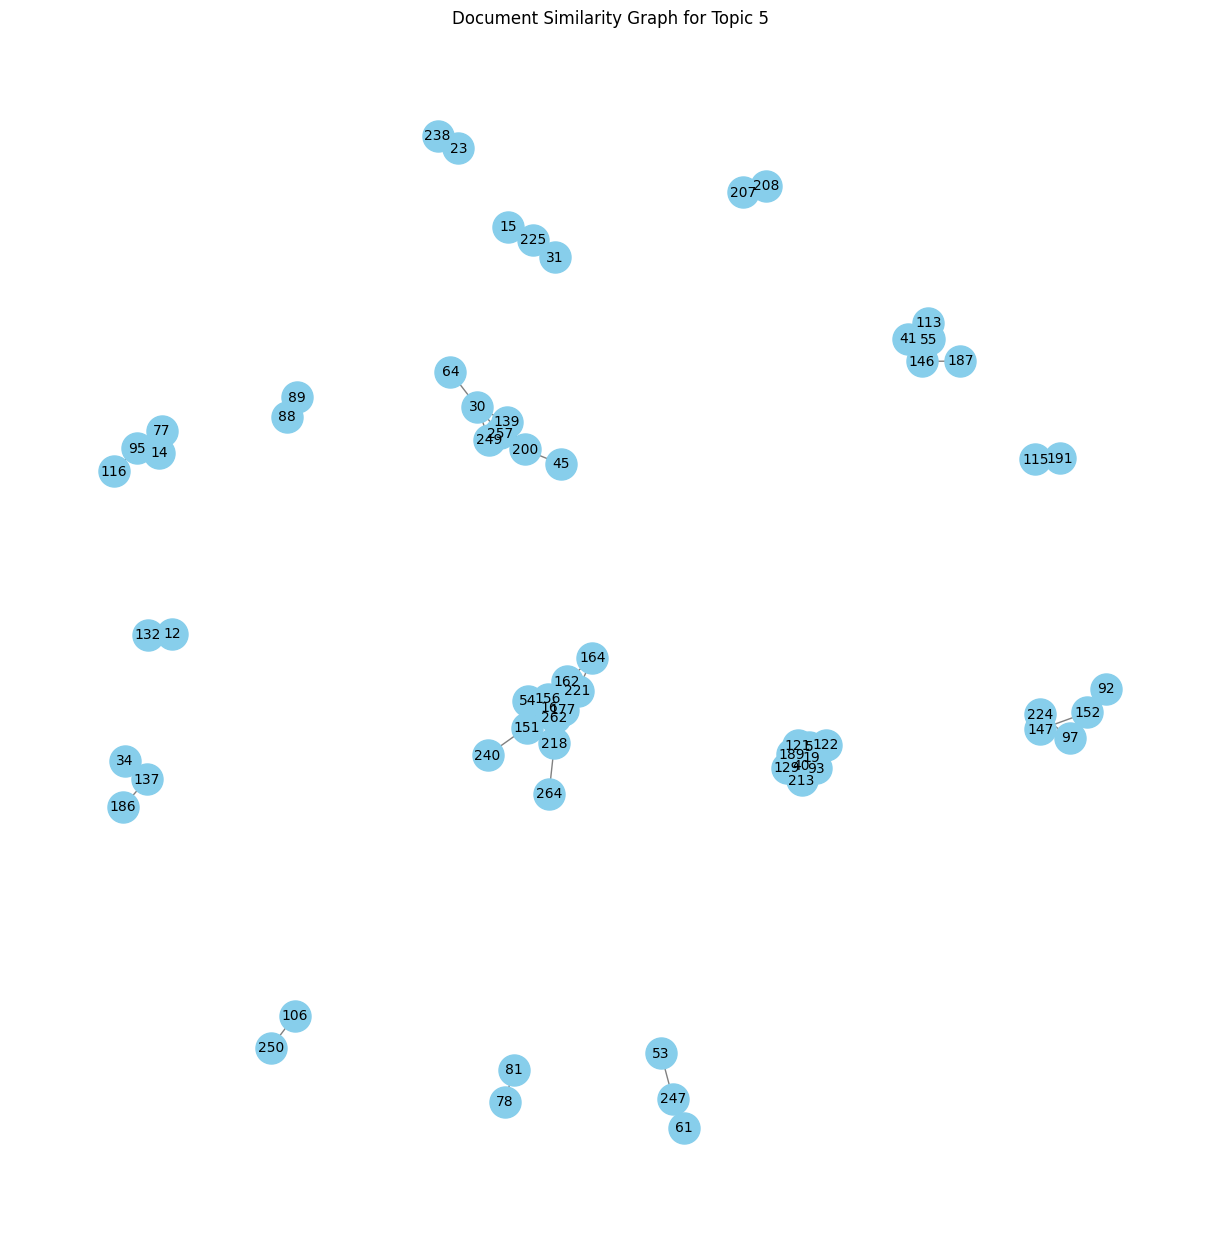

Documents related to Topic 6:

Document 1: Goals before I was born..Beckham❤❤

Document 2: Stick with ra if you like your bets fair and your winnings even fairer.

Document 3: Stick with ra for the best betting experience, their tech does not disappoint

Document 4: Their tech keeps all my deposits safe and makes withdrawing winnings easy as pie

Document 5: Verifying my account with ra was a breeze, security questions were smart but easy

Document 6: Tech at ra is just reliable, makes betting feel like a fun game not a chore

Document 7: Totally And if you&#;re into crash games, they have daily bonuses. I won some free plays yesterday

Document 8: Not yet, I&#;ve been glued to the cricket betting. There&#;s a match bonus for new games. Did you know

Document 9: Kinda crazy how he goes left EVERY TIME and goalies still don’t anticipate it

Document 10: beckham so underrated due to him being a celebrity. exquisite technique

Document 11: For me it goes like this: Eric Cantona, David Bec

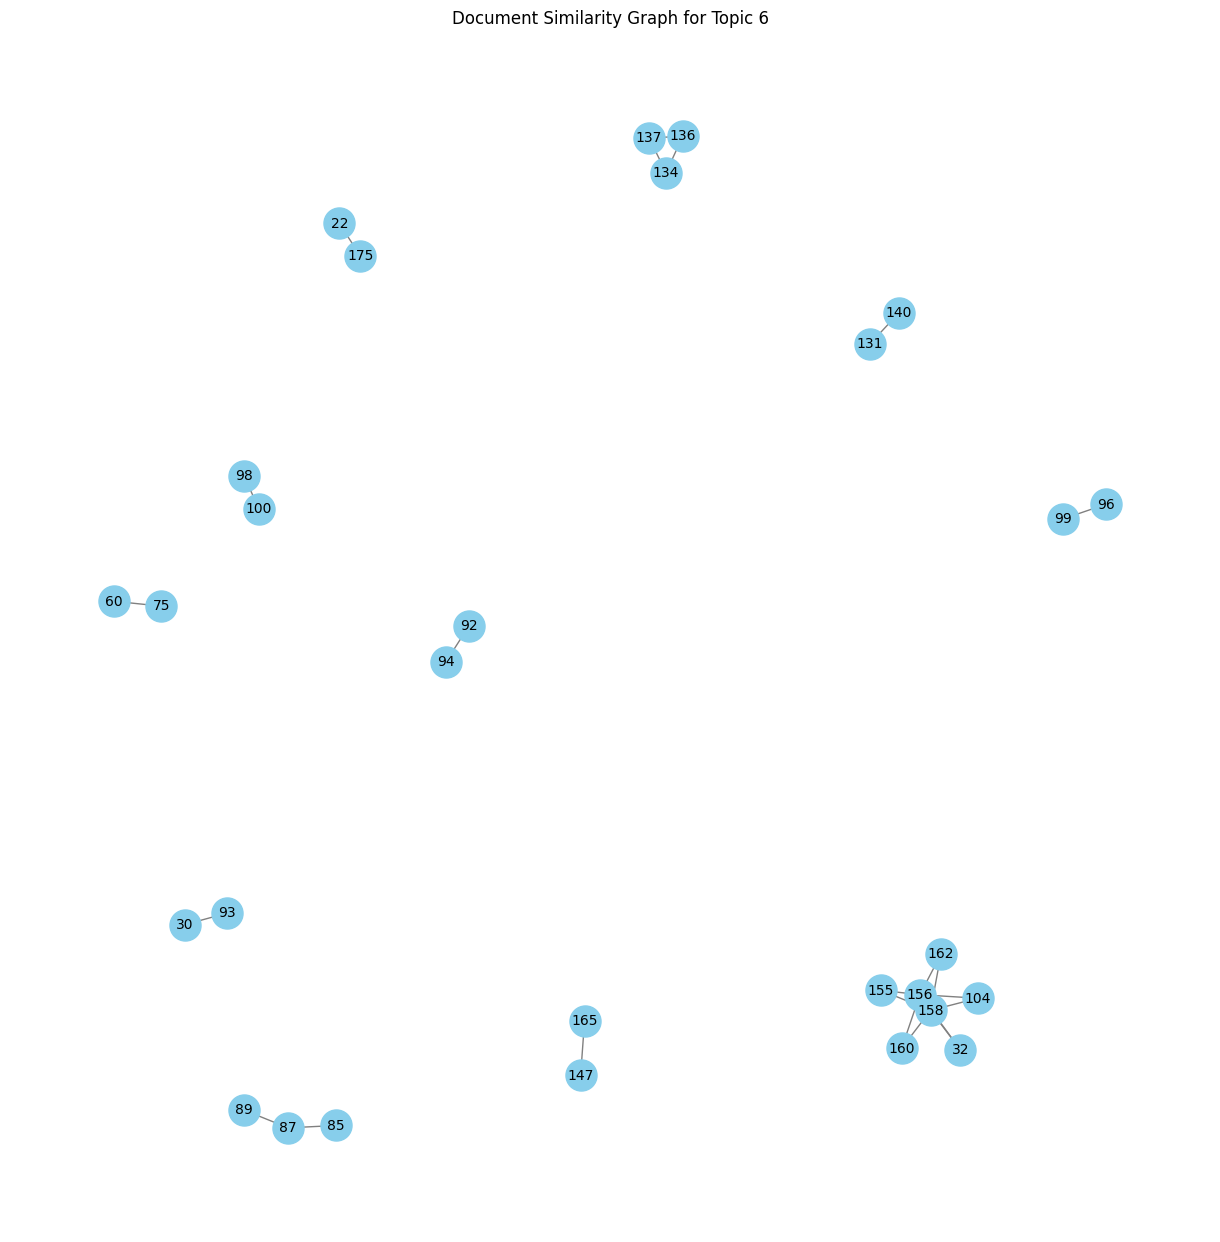

Documents related to Topic 7:

Document 1: I should check that out. Been eyeing the roulette games. There&#;s something about that spinning wheel

Document 2: Incredible shoot no given time to keeper

Document 3: Titi lookin a bit jelly for getting out-starred! :p

Document 4: Ok it&#;s awkward now between them

Document 5: Get William Regal xD

Document 6: La primera persona que veo limpiar la mesa todo el rato😂

Document 7: Great interview as usual. When are you getting Kamala on?

Document 8: Mermelada de su huerto londinense

Document 9: Thompson Margaret Harris Timothy Harris Ruth

Document 10: All he cares about is £££$$$

Document 11: Un Caballero. USA le agradecerá en el futuro el impulso que le dió al fútbol en el país con su equipo y con la contratación de Messi.

Document 12: David Beckham quero minhas coisas casa tudo lingerie meia fina salto alto tudo ficar sempre cheirosa e linda e fazer almoço jantar temperos frescos gostosos passear no final de semana viajar mas estou a

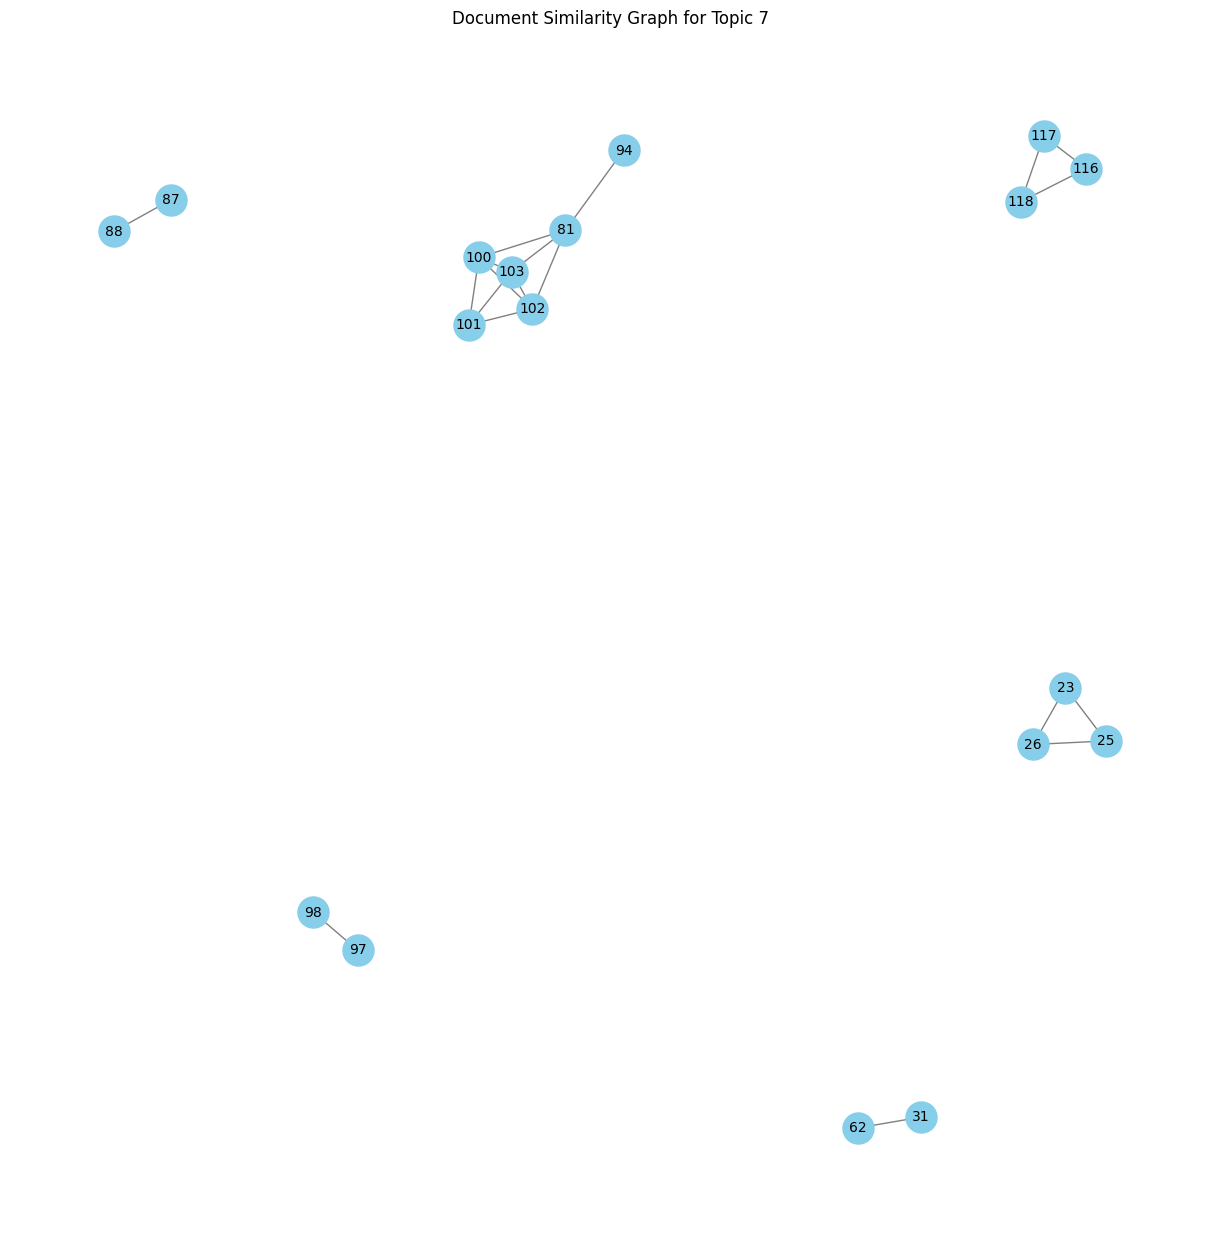

Documents related to Topic 8:

Document 1: Clearly not just a pretty face

Document 2: Becks is the reason i love footbal and be a united fans❤

Document 3: Always a fair game with ra, they really know how to treat bettors right.

Document 4: Never miss a game with RA, their site and app just never crash, so stable

Document 5: Never a delay in bet recalculations at ra, they keep it so professional

Document 6: Good to know I&#;m going to try out the late-night slots. There&#;s a night owl bonus for playing after midnight

Document 7: Muahshahhhhhhhhhhh you ain&#;t never gonna heat DB...ahahahahhhhhh

Document 8: Thala for Reason 😂

Document 9: David&#;s sticky stuff 😆

Document 10: I would bravely tell you that if this panel were composed of ONLY Britons, it could have been tasteless, biased, and even collapsed and closed upon its commencing 💯✍️<br>Hello <a href="http://www.youtube.com/results?search_query=%abdo">#Abdo</a>, <a href="http://www.youtube.com/results?search_query=%tt">#TT

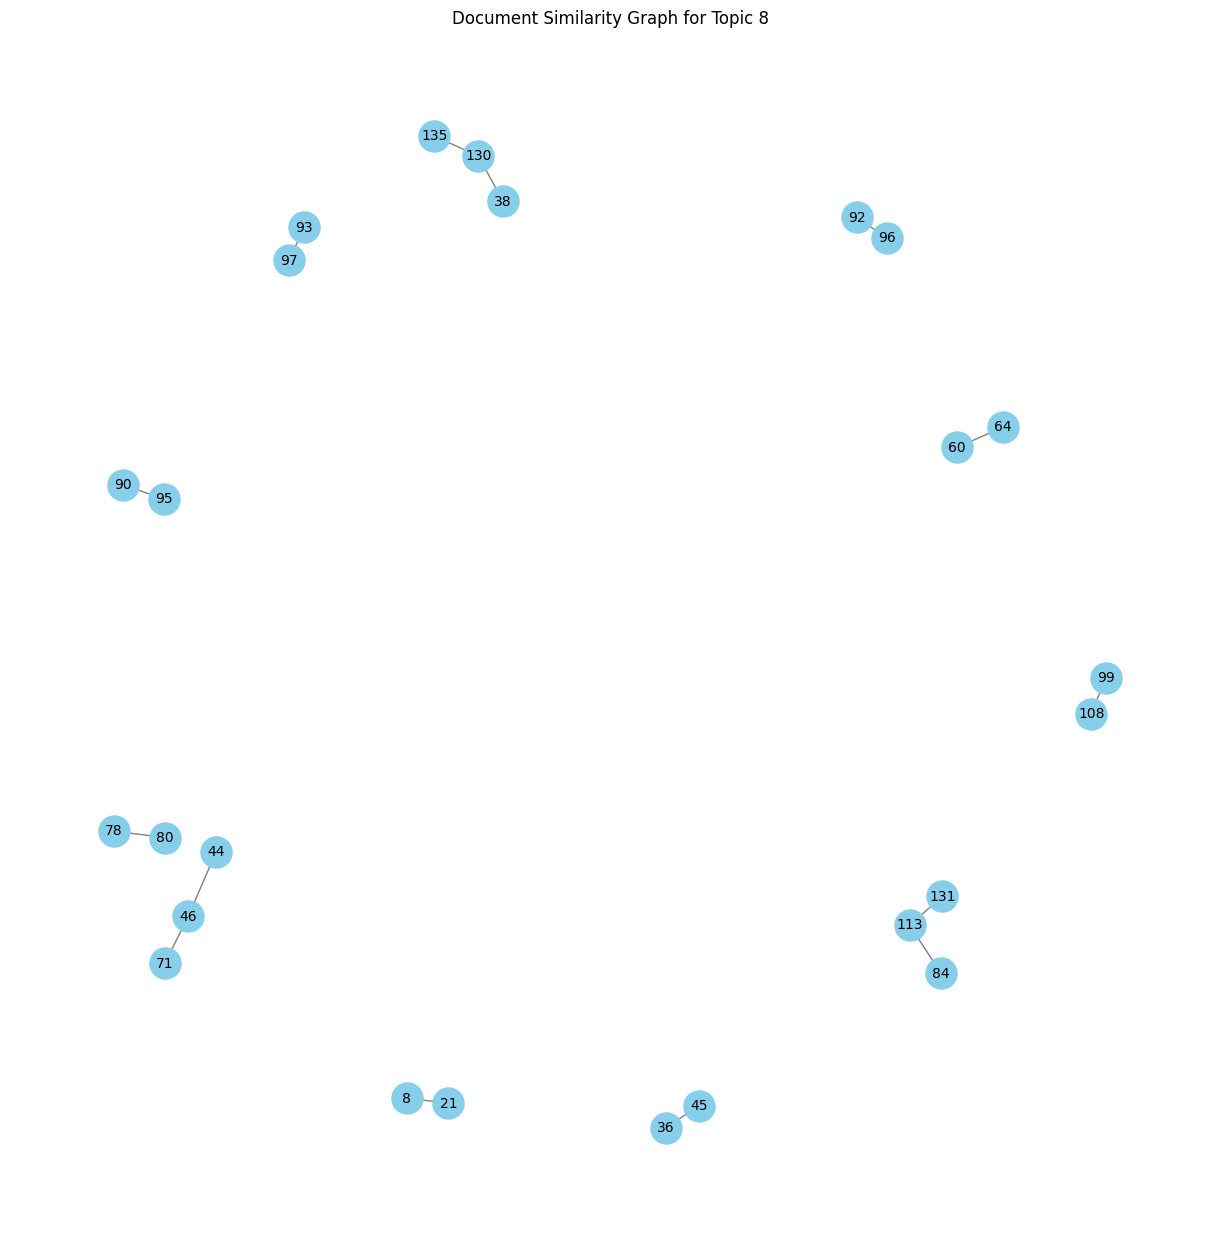

Documents related to Topic 9:

Document 1: Not yet but I saw there’s a loyalty program too. Earn points for playing and get exclusive rewards.

Document 2: Allen Jason Anderson Jennifer Anderson Margaret

Document 3: All I know is Beckham,  Ronaldo, Ronaldinho,  Messi, Pele, Zidane, Rooney, neymar were the best of all time.

Document 4: Got to love Beckham. I did some Arborist work outside his house in London on a very hot day and he sent ice cold bottles of san pelegrino water out to us, then walked over and had a chat. He’s a really nice guy.

Document 5: The time when Daivid was in MANU and RM .....it was best time to watch many legends ......

Document 6: If only his kids had his talent

Document 7: This is fantastic!😅😅😅

Document 8: She’s got no control over her emotions gets excited at every chance and interrupts the man! Let beckham speak!!

Document 9: best sports commentators on TV....Titi#

Document 10: When he runs to hold jamies hand that is fuckin hilarious

Document 11: H

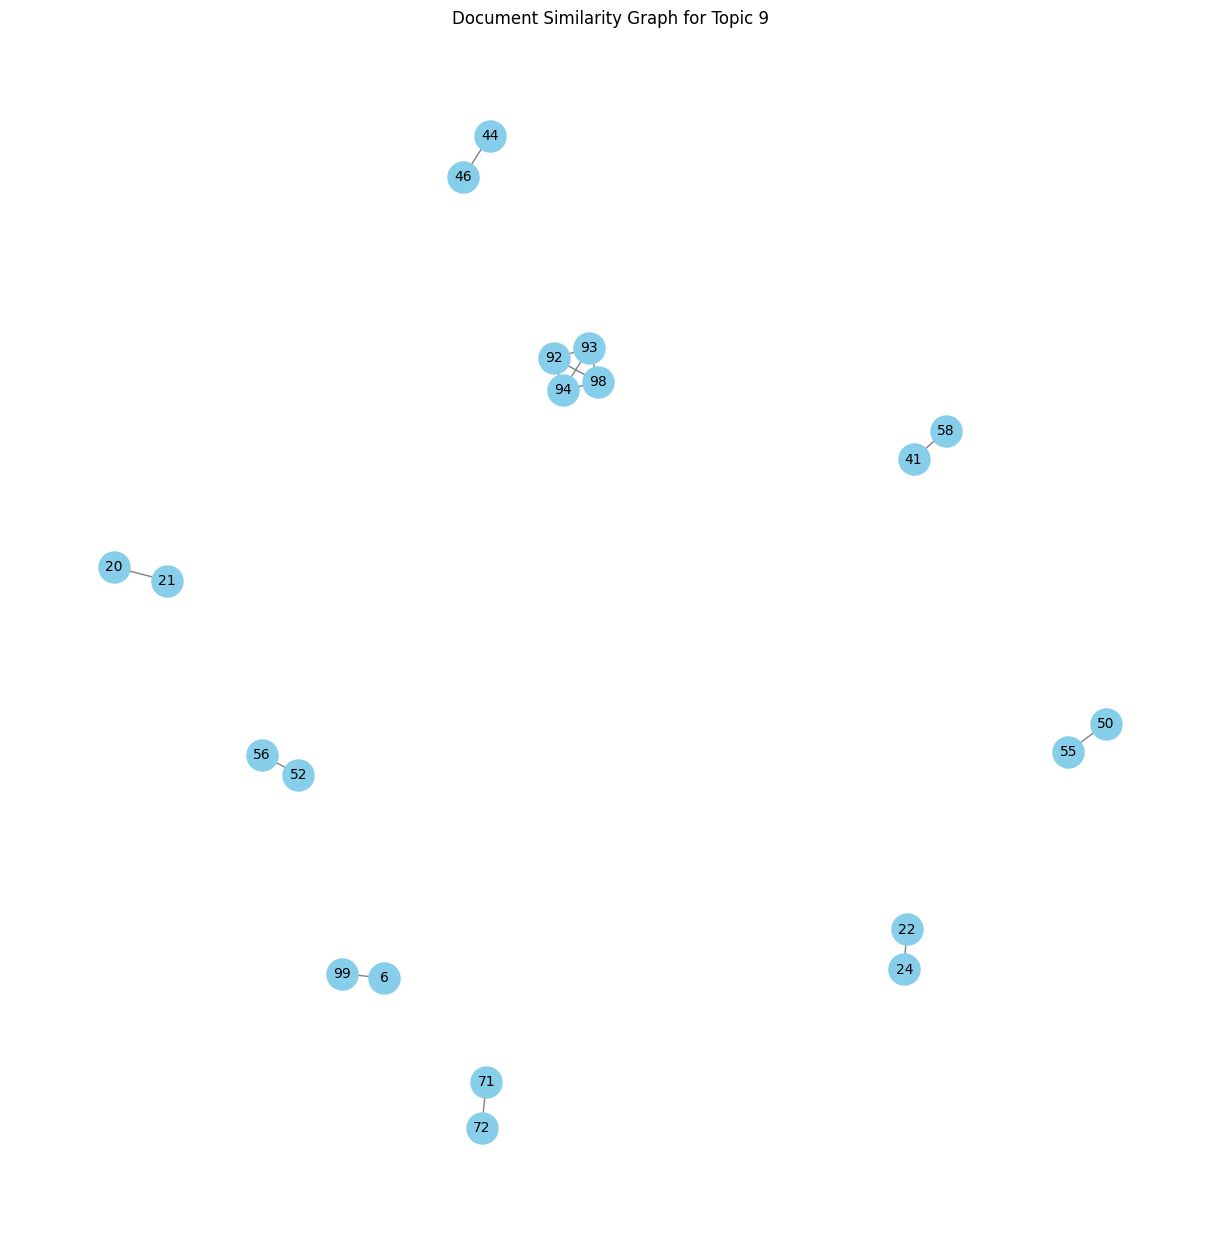

In [37]:
# Import necessary libraries
import numpy as np
import networkx as nx
from networkx.algorithms import community
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

threshold = 0.5
doc_topic_dist = ldaModel.transform(tf)
# Iterate over each topic
for topic_idx in range(ldaModel.n_components):  # Use n_components instead of num_topics
    # Extract documents related to the current topic
    related_docs_indices = np.where(doc_topic_dist[:, topic_idx] > threshold)[0]
    related_docs = [lPosts[i] for i in related_docs_indices]

    # Print the related documents
    print(f"Documents related to Topic {topic_idx}:\n")
    for idx, doc in enumerate(related_docs):
        print(f"Document {idx + 1}: {doc}\n")

    # Perform community analysis
    # Step 1: Vectorize the related documents using TF-IDF
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(related_docs)

    # Step 2: Compute cosine similarity matrix
    cosine_sim_matrix = cosine_similarity(tfidf_matrix)

    # Step 3: Create a graph from the cosine similarity matrix
    G = nx.Graph()
    for i in range(len(related_docs)):
        for j in range(i + 1, len(related_docs)):
            if cosine_sim_matrix[i, j] > 0.6:
                G.add_edge(i, j, weight=cosine_sim_matrix[i, j])

    # Step 4: Detect communities using the Girvan-Newman method
    communities_generator = community.girvan_newman(G)  # Call girvan_newman directly from the community module
    top_level_communities = next(communities_generator)
    sorted_communities = sorted(map(sorted, top_level_communities))

    # Print the communities
    print(f"Communities for Topic {topic_idx}:\n")
    for idx, community_list in enumerate(sorted_communities):  # Renamed 'community' to 'community_list' to avoid name conflict
        print(f"Community {idx + 1}:")
        for doc_idx in community_list:
            print(f"Document {doc_idx + 1}: {related_docs[doc_idx]}")
        print("="*80)  # Separator between communities

    # Export the graph to a GEXF file for Gephi
    nx.write_gexf(G, f"youtube_document_similarity_graph_topic_{topic_idx}.gexf")

    # Visualize the graph and save it as an image
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_color="black", edge_color="gray")
    plt.title(f"Document Similarity Graph for Topic {topic_idx}")
    plt.savefig(f"youtube_document_similarity_graph_topic_{topic_idx}.png")  # Save the graph as an image
    plt.show()